In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("Untitled Folder/global_house_purchase_dataset.csv")

In [5]:
df

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,legal_cases_on_property,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,2,1,1,1,0,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,8,1,1,1,1,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,1,1,1,0,0,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,3,0,1,0,0,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,3,1,1,3,1,17676,65833,25,8965,33208,0.03,3,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,Germany,Berlin,Villa,Fully-Furnished,685,203328,1968,1,3,2,0,0,1,0,78330,104050,15,17670,99278,0.01,8,4,5,1
199996,199997,China,Shenzhen,Townhouse,Unfurnished,3818,1454627,1977,5,7,5,1,1,1,0,25400,1175297,20,2865,279330,0.34,7,10,9,1
199997,199998,Japan,Kyoto,Villa,Semi-Furnished,3603,1619147,1990,2,4,4,1,1,1,0,28220,743049,30,5595,876098,0.17,5,3,9,0
199998,199999,South Africa,Johannesburg,Apartment,Unfurnished,1706,306165,2010,0,4,1,1,0,0,1,12240,150774,15,16300,155391,0.11,6,10,6,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   property_id              200000 non-null  int64  
 1   country                  200000 non-null  object 
 2   city                     200000 non-null  object 
 3   property_type            200000 non-null  object 
 4   furnishing_status        200000 non-null  object 
 5   property_size_sqft       200000 non-null  int64  
 6   price                    200000 non-null  int64  
 7   constructed_year         200000 non-null  int64  
 8   previous_owners          200000 non-null  int64  
 9   rooms                    200000 non-null  int64  
 10  bathrooms                200000 non-null  int64  
 11  garage                   200000 non-null  int64  
 12  garden                   200000 non-null  int64  
 13  crime_cases_reported     200000 non-null  int64  
 14  lega

In [7]:
df.isnull().sum()

property_id                0
country                    0
city                       0
property_type              0
furnishing_status          0
property_size_sqft         0
price                      0
constructed_year           0
previous_owners            0
rooms                      0
bathrooms                  0
garage                     0
garden                     0
crime_cases_reported       0
legal_cases_on_property    0
customer_salary            0
loan_amount                0
loan_tenure_years          0
monthly_expenses           0
down_payment               0
emi_to_income_ratio        0
satisfaction_score         0
neighbourhood_rating       0
connectivity_score         0
decision                   0
dtype: int64

In [10]:
one_hot = pd.get_dummies(df['country'])

In [12]:
df = pd.concat([df,one_hot],axis=1)

In [13]:
df

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,legal_cases_on_property,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision,Australia,Brazil,Canada,China,France,Germany,India,Japan,Singapore,South Africa,UAE,UK,USA
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,2,1,1,1,0,10745,193949,15,6545,218986,0.16,1,5,6,0,False,False,False,False,True,False,False,False,False,False,False,False,False
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,8,1,1,1,1,16970,181465,20,8605,43073,0.08,9,1,2,0,False,False,False,False,False,False,False,False,False,True,False,False,False
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,1,1,1,0,0,21914,307953,30,2510,437151,0.09,6,8,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,3,0,1,0,0,17980,674720,15,8805,436239,0.33,2,6,6,0,False,False,False,False,False,True,False,False,False,False,False,False,False
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,3,1,1,3,1,17676,65833,25,8965,33208,0.03,3,3,4,0,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,Germany,Berlin,Villa,Fully-Furnished,685,203328,1968,1,3,2,0,0,1,0,78330,104050,15,17670,99278,0.01,8,4,5,1,False,False,False,False,False,True,False,False,False,False,False,False,False
199996,199997,China,Shenzhen,Townhouse,Unfurnished,3818,1454627,1977,5,7,5,1,1,1,0,25400,1175297,20,2865,279330,0.34,7,10,9,1,False,False,False,True,False,False,False,False,False,False,False,False,False
199997,199998,Japan,Kyoto,Villa,Semi-Furnished,3603,1619147,1990,2,4,4,1,1,1,0,28220,743049,30,5595,876098,0.17,5,3,9,0,False,False,False,False,False,False,False,True,False,False,False,False,False
199998,199999,South Africa,Johannesburg,Apartment,Unfurnished,1706,306165,2010,0,4,1,1,0,0,1,12240,150774,15,16300,155391,0.11,6,10,6,0,False,False,False,False,False,False,False,False,False,True,False,False,False


In [16]:
le = LabelEncoder()
df['furnishing_status'] = le.fit_transform(df['furnishing_status'])

In [17]:
df

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,legal_cases_on_property,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision,Australia,Brazil,Canada,China,France,Germany,India,Japan,Singapore,South Africa,UAE,UK,USA
0,1,France,Marseille,Farmhouse,1,991,412935,1989,6,6,2,1,1,1,0,10745,193949,15,6545,218986,0.16,1,5,6,0,False,False,False,False,True,False,False,False,False,False,False,False,False
1,2,South Africa,Cape Town,Apartment,1,1244,224538,1990,4,8,8,1,1,1,1,16970,181465,20,8605,43073,0.08,9,1,2,0,False,False,False,False,False,False,False,False,False,True,False,False,False
2,3,South Africa,Johannesburg,Farmhouse,1,4152,745104,2019,5,2,1,1,1,0,0,21914,307953,30,2510,437151,0.09,6,8,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False
3,4,Germany,Frankfurt,Farmhouse,1,3714,1110959,2008,1,3,3,0,1,0,0,17980,674720,15,8805,436239,0.33,2,6,6,0,False,False,False,False,False,True,False,False,False,False,False,False,False
4,5,South Africa,Johannesburg,Townhouse,0,531,99041,2007,6,3,3,1,1,3,1,17676,65833,25,8965,33208,0.03,3,3,4,0,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,Germany,Berlin,Villa,0,685,203328,1968,1,3,2,0,0,1,0,78330,104050,15,17670,99278,0.01,8,4,5,1,False,False,False,False,False,True,False,False,False,False,False,False,False
199996,199997,China,Shenzhen,Townhouse,2,3818,1454627,1977,5,7,5,1,1,1,0,25400,1175297,20,2865,279330,0.34,7,10,9,1,False,False,False,True,False,False,False,False,False,False,False,False,False
199997,199998,Japan,Kyoto,Villa,1,3603,1619147,1990,2,4,4,1,1,1,0,28220,743049,30,5595,876098,0.17,5,3,9,0,False,False,False,False,False,False,False,True,False,False,False,False,False
199998,199999,South Africa,Johannesburg,Apartment,2,1706,306165,2010,0,4,1,1,0,0,1,12240,150774,15,16300,155391,0.11,6,10,6,0,False,False,False,False,False,False,False,False,False,True,False,False,False


In [20]:
df['property_type'].nunique()

6

In [21]:
df['property_type'] = le.fit_transform(df['property_type'])

In [24]:
df['city'].nunique()

40

In [25]:
df_city = pd.get_dummies(df['city'])
df = pd.concat([df,df_city],axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 78 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   property_id              200000 non-null  int64  
 1   country                  200000 non-null  object 
 2   city                     200000 non-null  object 
 3   property_type            200000 non-null  int64  
 4   furnishing_status        200000 non-null  int64  
 5   property_size_sqft       200000 non-null  int64  
 6   price                    200000 non-null  int64  
 7   constructed_year         200000 non-null  int64  
 8   previous_owners          200000 non-null  int64  
 9   rooms                    200000 non-null  int64  
 10  bathrooms                200000 non-null  int64  
 11  garage                   200000 non-null  int64  
 12  garden                   200000 non-null  int64  
 13  crime_cases_reported     200000 non-null  int64  
 14  lega

In [28]:
df['country'].drop

<bound method Series.drop of 0               France
1         South Africa
2         South Africa
3              Germany
4         South Africa
              ...     
199995         Germany
199996           China
199997           Japan
199998    South Africa
199999          Brazil
Name: country, Length: 200000, dtype: object>

In [41]:
df = df.drop('city',axis=1)

In [42]:
df 

,property_id,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,legal_cases_on_property,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision,Abu Dhabi,Bangalore,Beijing,Berlin,Birmingham,Brisbane,Cape Town,Chennai,Chicago,Delhi,Dubai,Frankfurt,Houston,Hyderabad,Johannesburg,Kyoto,Liverpool,London,Los Angeles,Lyon,Manchester,Marseille,Melbourne,Montreal,Mumbai,Munich,New York,Osaka,Paris,Pune,Rio de Janeiro,San Francisco,Shanghai,Shenzhen,Sydney,São Paulo,Tokyo,Toronto,Vancouver
0,1,1,1,991,412935,1989,6,6,2,1,1,1,0,10745,193949,15,6545,218986,0.16,1,5,6,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,0,1,1244,224538,1990,4,8,8,1,1,1,1,16970,181465,20,8605,43073,0.08,9,1,2,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,1,1,4152,745104,2019,5,2,1,1,1,0,0,21914,307953,30,2510,437151,0.09,6,8,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,1,1,3714,1110959,2008,1,3,3,0,1,0,0,17980,674720,15,8805,436239,0.33,2,6,6,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,4,0,531,99041,2007,6,3,3,1,1,3,1,17676,65833,25,8965,33208,0.03,3,3,4,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,5,0,685,203328,1968,1,3,2,0,0,1,0,78330,104050,15,17670,99278,0.01,8,4,5,1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199996,199997,4,2,3818,1454627,1977,5,7,5,1,1,1,0,25400,1175297,20,2865,279330,0.34,7,10,9,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
199997,199998,5,1,3603,1619147,1990,2,4,4,1,1,1,0,28220,743049,30,5595,876098,0.17,5,3,9,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199998,199999,0,2,1706,306165,2010,0,4,1,1,0,0,1,12240,150774,15,16300,155391,0.11,6,10,6,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
df.describe()

,property_id,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,legal_cases_on_property,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
count,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,2.497625,0.998345,3195.633460,1.215365e+06,1991.487770,3.001370,4.513855,2.760030,0.499350,0.500215,1.229065,0.248920,46528.625830,7.597583e+05,19.986375,10559.693105,4.556068e+05,0.195387,5.498650,5.505240,5.495615,0.230340
std,57735.171256,1.709236,0.816478,1613.322287,8.236633e+05,18.494064,2.002198,2.295669,1.840959,0.500001,0.500001,1.185336,0.432388,27997.353766,5.489401e+05,7.081080,5427.241879,3.629865e+05,0.219689,2.875361,2.870945,2.870206,0.421052
min,1.000000,0.000000,0.000000,400.000000,5.628800e+04,1960.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,2.350400e+04,10.000000,500.000000,8.966000e+03,0.000000,1.000000,1.000000,1.000000,0.000000
25%,50000.750000,1.000000,0.000000,1802.000000,5.659895e+05,1975.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,21450.000000,3.372802e+05,15.000000,5770.000000,1.849592e+05,0.070000,3.000000,3.000000,3.000000,0.000000
50%,100000.500000,2.000000,1.000000,3190.000000,1.023429e+06,1991.000000,3.000000,5.000000,2.000000,0.000000,1.000000,1.000000,0.000000,41465.000000,6.269325e+05,20.000000,10520.000000,3.561700e+05,0.130000,5.000000,5.000000,5.000000,0.000000
75%,150000.250000,4.000000,2.000000,4589.000000,1.725556e+06,2008.000000,5.000000,7.000000,4.000000,1.000000,1.000000,2.000000,0.000000,70805.000000,1.058416e+06,25.000000,15260.000000,6.257352e+05,0.240000,8.000000,8.000000,8.000000,0.000000
max,200000.000000,5.000000,2.000000,6000.000000,4.202732e+06,2023.000000,6.000000,8.000000,8.000000,1.000000,1.000000,10.000000,1.000000,100000.000000,3.520150e+06,30.000000,20000.000000,2.492723e+06,3.460000,10.000000,10.000000,10.000000,1.000000


In [45]:
df['price'].max()

4202732

<Axes: ylabel='price'>

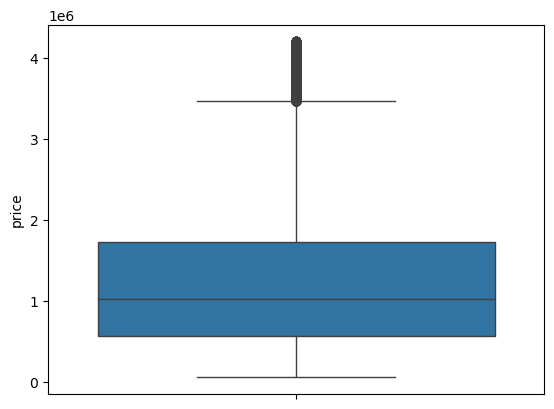

In [47]:
sns.boxplot(df['price'])
plt.

In [48]:
model = KNeighborsClassifier()

In [81]:
x = df[['property_id', 'property_type', 'furnishing_status',
       'property_size_sqft', 'price', 'constructed_year', 'previous_owners',
       'rooms', 'bathrooms', 'garage', 'garden', 'crime_cases_reported',
       'legal_cases_on_property', 'customer_salary', 'loan_amount',
       'loan_tenure_years', 'monthly_expenses', 'down_payment',
       'emi_to_income_ratio', 'satisfaction_score', 'neighbourhood_rating',
       'connectivity_score', 'Abu Dhabi', 'Bangalore', 'Beijing',
       'Berlin', 'Birmingham', 'Brisbane', 'Cape Town', 'Chennai', 'Chicago',
       'Delhi', 'Dubai', 'Frankfurt', 'Houston', 'Hyderabad', 'Johannesburg',
       'Kyoto', 'Liverpool', 'London', 'Los Angeles', 'Lyon', 'Manchester',
       'Marseille', 'Melbourne', 'Montreal', 'Mumbai', 'Munich', 'New York',
       'Osaka', 'Paris', 'Pune', 'Rio de Janeiro', 'San Francisco', 'Shanghai',
       'Shenzhen', 'Sydney', 'São Paulo', 'Tokyo', 'Toronto', 'Vancouver']]

In [82]:
y = df['decision']

In [83]:
x

,property_id,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,legal_cases_on_property,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,Abu Dhabi,Bangalore,Beijing,Berlin,Birmingham,Brisbane,Cape Town,Chennai,Chicago,Delhi,Dubai,Frankfurt,Houston,Hyderabad,Johannesburg,Kyoto,Liverpool,London,Los Angeles,Lyon,Manchester,Marseille,Melbourne,Montreal,Mumbai,Munich,New York,Osaka,Paris,Pune,Rio de Janeiro,San Francisco,Shanghai,Shenzhen,Sydney,São Paulo,Tokyo,Toronto,Vancouver
0,1,1,1,991,412935,1989,6,6,2,1,1,1,0,10745,193949,15,6545,218986,0.16,1,5,6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,0,1,1244,224538,1990,4,8,8,1,1,1,1,16970,181465,20,8605,43073,0.08,9,1,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,1,1,4152,745104,2019,5,2,1,1,1,0,0,21914,307953,30,2510,437151,0.09,6,8,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,1,1,3714,1110959,2008,1,3,3,0,1,0,0,17980,674720,15,8805,436239,0.33,2,6,6,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,4,0,531,99041,2007,6,3,3,1,1,3,1,17676,65833,25,8965,33208,0.03,3,3,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,5,0,685,203328,1968,1,3,2,0,0,1,0,78330,104050,15,17670,99278,0.01,8,4,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199996,199997,4,2,3818,1454627,1977,5,7,5,1,1,1,0,25400,1175297,20,2865,279330,0.34,7,10,9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
199997,199998,5,1,3603,1619147,1990,2,4,4,1,1,1,0,28220,743049,30,5595,876098,0.17,5,3,9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199998,199999,0,2,1706,306165,2010,0,4,1,1,0,0,1,12240,150774,15,16300,155391,0.11,6,10,6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [84]:
y

0         0
1         0
2         0
3         0
4         0
         ..
199995    1
199996    1
199997    0
199998    0
199999    0
Name: decision, Length: 200000, dtype: int64

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)

In [95]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [96]:
knn_model_pred = model.predict(x_test)

In [97]:
print(classification_report(y_test,knn_model_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84     30812
           1       0.26      0.11      0.15      9188

    accuracy                           0.73     40000
   macro avg       0.52      0.51      0.49     40000
weighted avg       0.66      0.73      0.68     40000



In [98]:
from sklearn.naive_bayes import GaussianNB
nb_model_pred = model.predict(x_test)
print(classification_report(y_test,nb_model_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84     30812
           1       0.26      0.11      0.15      9188

    accuracy                           0.73     40000
   macro avg       0.52      0.51      0.49     40000
weighted avg       0.66      0.73      0.68     40000



In [92]:
b = []
for i in range(1,25):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    model.fit(x_train,y_train)
    knn_model_pred=model.predict(x_test)
    # print(f'for random state : {i} and ACCU in {accuracy_score(y_test,knn_model_pred)}')
    b.append(accuracy_score(y_test,knn_model_pred))

In [93]:
b.index(max(b))+1

24